## **Phase 3: Sentiment Analysis of Attributes**



---
### **PREPARATION: Upload Files from Local**

In [ ]:
pip install openpyxl vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from google.colab import files

uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# Menampilkan informasi file yang diunggah
print(f'File {file_name} berhasil diunggah.')

df = pd.read_excel(file_name)

Saving preSentiment_highRatingApp.xlsx to preSentiment_highRatingApp.xlsx
File preSentiment_highRatingApp.xlsx berhasil diunggah.


---
### **Calculating Sentiment Values of Each Sub-attribute**

In [ ]:
from google.colab import files
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd

# Data sub-atribut
sub_atribut = pd.read_excel("preSentiment_highRatingApp.xlsx")

# Convert to DataFrame
df_sentimen = pd.DataFrame(columns=['Atribut', 'Sub-atribut'])
for column in sub_atribut.columns:
    sub_atribut_list = sub_atribut[column].dropna().tolist()
    df_sentimen = pd.concat([df_sentimen, pd.DataFrame({'Atribut': [column]*len(sub_atribut_list), 'Sub-atribut': sub_atribut_list})], ignore_index=True)

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Calculate sentiment using VADER
df_sentimen['Nilai Sentimen'] = df_sentimen['Sub-atribut'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
df_sentimen['Label Sentimen'] = df_sentimen['Nilai Sentimen'].apply(lambda x: 'Positif' if x > 0.05 else 'Negatif' if x < -0.05 else 'Netral')

# Display the DataFrame
df_sentimen

,Atribut,Sub-atribut,Nilai Sentimen,Label Sentimen
0,efficiency,capacity,0.0000,Netral
1,efficiency,ease,0.3612,Positif
2,efficiency,seamless,0.0000,Netral
3,efficiency,efficiency,0.3612,Positif
4,efficiency,convenience,0.0000,Netral
...,...,...,...,...
4934,contact,detail,0.0000,Netral
4935,contact,fantastic,0.5574,Positif
4936,contact,accessible,0.0000,Netral
4937,contact,glare,0.0000,Netral


In [ ]:
# Save to Excel
df_sentimen.to_excel('VADER_sentiment_highRating.xlsx', index=False)
files.download(f'VADER_sentiment_highRating.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

---
### **Calculating Sentiment Values of Each Attribute**

In [ ]:
# Menghitung nilai sentimen keseluruhan dari setiap atribut dan menambahkannya ke dalam dataframe
df_nilai_sentimen_atribut = pd.DataFrame(columns=['Atribut', 'Nilai Sentimen Positif', 'Nilai Sentimen Negatif', 'Nilai Sentimen Keseluruhan'])

for atribut in df_sentimen['Atribut'].unique():
    df_atribut = df_sentimen[df_sentimen['Atribut'] == atribut]
    df_positif = df_atribut[df_atribut['Label Sentimen'] == 'Positif']
    df_negatif = df_atribut[df_atribut['Label Sentimen'] == 'Negatif']

    total_sentimen_positif = df_positif['Nilai Sentimen'].sum()
    total_sentimen_negatif = df_negatif['Nilai Sentimen'].sum()

    # Menghitung nilai sentimen keseluruhan
    total_sentimen_keseluruhan = total_sentimen_positif + abs(total_sentimen_negatif)

    # Menambahkan hasil ke dalam dataframe
    df_nilai_sentimen_atribut = pd.concat([df_nilai_sentimen_atribut, pd.DataFrame({
        'Atribut': [atribut],
        'Nilai Sentimen Positif': [total_sentimen_positif],
        'Nilai Sentimen Negatif': [total_sentimen_negatif],
        'Nilai Sentimen Keseluruhan': [total_sentimen_keseluruhan]
    })], ignore_index=True)

# Menghitung mean dari nilai sentimen keseluruhan untuk semua atribut
mean_nilai_sentimen_keseluruhan = round(df_nilai_sentimen_atribut['Nilai Sentimen Keseluruhan'].mean(), 4)
df_nilai_sentimen_atribut['Mean Nilai Sentimen Keseluruhan'] = mean_nilai_sentimen_keseluruhan

# Memformat output dataframe untuk menampilkan angka maksimal 4 angka di belakang koma
df_nilai_sentimen_atribut = df_nilai_sentimen_atribut.round(4)

print("Nilai Sentimen dari Setiap Atribut:")
df_nilai_sentimen_atribut

Nilai Sentimen dari Setiap Atribut:


,Atribut,Nilai Sentimen Positif,Nilai Sentimen Negatif,Nilai Sentimen Keseluruhan,Mean Nilai Sentimen Keseluruhan
0,efficiency,39.8667,-18.5153,58.3820,54.0792
1,system availability,39.3822,-18.8553,58.2375,54.0792
2,fulfillment,41.9549,-19.0816,61.0365,54.0792
3,privacy,33.1270,-13.9243,47.0513,54.0792
4,responsiveness,40.0071,-17.9571,57.9642,54.0792
5,compensation,40.9426,-19.4428,60.3854,54.0792
6,contact,24.9507,-10.5468,35.4975,54.0792


## **Phase 4: Kano-IPA Analysis**

---
### **Classifying Attributes into Kano Categories**





> **Interpretasi Klasifikasi:**
- Basic (Dasar): jika nilai SI atribut berada di bawah ambang batas bawah
- Performance (Prestasi): jika nilai SI atribut berada di antara ambang batas bawah dan atas.
- Excitement (Penggairah): jika nilai SI atribut berada di atas ambang batas atas.



In [ ]:
# Menghitung SI untuk setiap atribut
df_nilai_sentimen_atribut['SI'] = (
    df_nilai_sentimen_atribut['Nilai Sentimen Positif'] - df_nilai_sentimen_atribut['Nilai Sentimen Negatif']
) / (df_nilai_sentimen_atribut['Nilai Sentimen Positif'] - df_nilai_sentimen_atribut['Nilai Sentimen Negatif'].min())

# Menghitung mean dari SI
mean_si = df_nilai_sentimen_atribut['SI'].mean()

# Menghitung theta (θ)
theta = (df_nilai_sentimen_atribut['SI'].max() - df_nilai_sentimen_atribut['SI'].min()) / 6

# Menghitung upper & lower threshold
upper_threshold = mean_si + theta
lower_threshold = mean_si - theta

# Klasifikasi setiap atribut ke dalam kategori Kano
def classify_kano(si, mean, theta):
    if si < (mean - theta):
        return 'Basic'
    elif (mean - theta) <= si <= (mean + theta):
        return 'Performance'
    else:
        return 'Excitement'

df_nilai_sentimen_atribut['Kategori Kano'] = df_nilai_sentimen_atribut['SI'].apply(
    lambda si: classify_kano(si, mean_si, theta)
)

# Dataframe untuk nilai mean, theta, serta ambang batas atas dan bawah
df_thresholds = pd.DataFrame({
    'Parameter': ['Mean', 'Theta (θ)', 'Upper Threshold', 'Lower Threshold'],
    'Value': [mean_si, theta, upper_threshold, lower_threshold]
})

# DataFrame untuk atribut, SI, dan Kategori
df_kano_classification = df_nilai_sentimen_atribut[['Atribut', 'SI', 'Kategori Kano']]

df_kano_classification, df_thresholds

(               Atribut        SI Kategori Kano
 0           efficiency  0.984362    Excitement
 1  system availability  0.990013    Excitement
 2          fulfillment  0.994117    Excitement
 3              privacy  0.895025         Basic
 4       responsiveness  0.975009   Performance
 5         compensation  1.000000    Excitement
 6              contact  0.799610         Basic,
          Parameter     Value
 0             Mean  0.948305
 1        Theta (θ)  0.033398
 2  Upper Threshold  0.981703
 3  Lower Threshold  0.914907)

---
### **Obtaining the Importance of Attributes by TF-IDF**



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

data = pd.read_excel("preSentiment_highRatingApp.xlsx")

# Menggabungkan semua sub-atribut menjadi satu string untuk setiap atribut utama
text_documents = data.apply(lambda x: ' '.join(x.dropna().values.tolist()), axis=0)

# Inisialisasi TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Menghitung matriks TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(text_documents)

# Mendapatkan fitur kata dan menghitung skor TF-IDF rata-rata untuk setiap atribut utama
features = tfidf_vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.mean(axis=0).tolist()[0]

# Membuat dictionary dengan atribut utama dan skor TF-IDF rata-rata mereka
tfidf_dict = dict(zip(data.columns, tfidf_scores))

# Membuat DataFrame dari dictionary (pembulatan maksimal 4 angka desimal)
tfidf_df = pd.DataFrame(list(tfidf_dict.items()), columns=['Atribut', 'Nilai TF-IDF'])
tfidf_df['Nilai TF-IDF'] = tfidf_df['Nilai TF-IDF'].round(4)

# Menghitung mean dari nilai TF-IDF untuk semua atribut
mean_tfidf = round(tfidf_df['Nilai TF-IDF'].mean(), 4)
tfidf_df['Mean TF-IDF'] = mean_tfidf

# Memformat output dataframe untuk menampilkan angka maksimal 4 angka di belakang koma
tfidf_df = tfidf_df.round(4)

print("Nilai TF-IDF untuk Setiap Atribut:")
tfidf_df

Nilai TF-IDF untuk Setiap Atribut:


,Atribut,Nilai TF-IDF,Mean TF-IDF
0,efficiency,0.0353,0.0335
1,system availability,0.0353,0.0335
2,fulfillment,0.0353,0.0335
3,privacy,0.0275,0.0335
4,responsiveness,0.0353,0.0335
5,compensation,0.0353,0.0335
6,contact,0.0303,0.0335


---
### **Plot the Results Into an IPA Diagram**



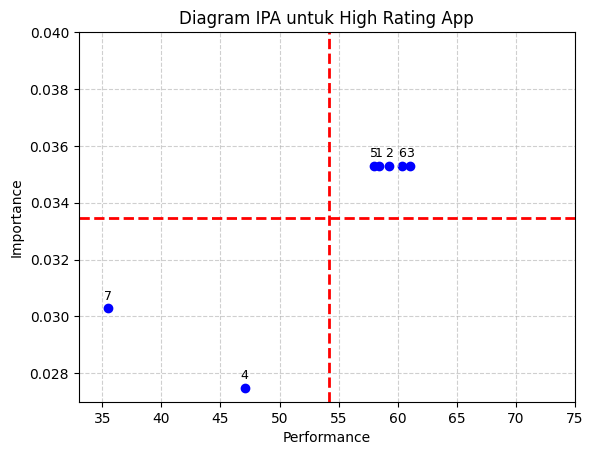

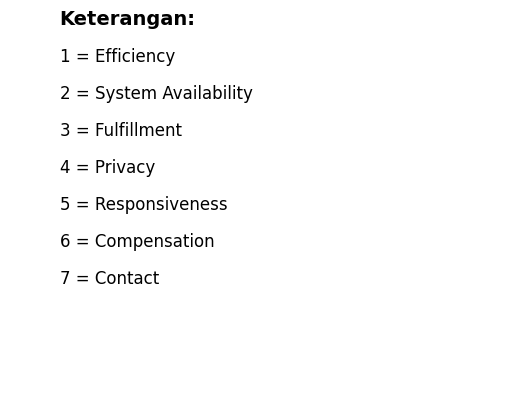

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Input data
data = {
    'Atribut': ['efficiency', 'system availability', 'fulfillment', 'privacy', 'responsiveness', 'compensation', 'contact'],
    'Nilai Performance': [58.3820, 59.2375, 61.0365, 47.0513, 57.9642, 60.3854, 35.4975],
    'Nilai Importance': [0.0353, 0.0353, 0.0353, 0.0275, 0.0353, 0.0353, 0.0303]
}

df = pd.DataFrame(data)

# Menghitung mean dari nilai importance dan performance
mean_importance = df['Nilai Importance'].mean()
mean_performance = df['Nilai Performance'].mean()

# Buat plot IPA
fig, ax = plt.subplots()

# Plot titik-titik atribut dengan angka
for i, row in df.iterrows():
    ax.scatter(row['Nilai Performance'], row['Nilai Importance'], color='blue')
    ax.text(row['Nilai Performance'], row['Nilai Importance'] + 0.0003, str(i + 1), fontsize=9, ha='center')

# Tarik garis rata-rata untuk pemisah kuadran
ax.axhline(y=mean_importance, color='red', linestyle='--', linewidth=2)
ax.axvline(x=mean_performance, color='red', linestyle='--', linewidth=2)

# Set labels dan judul
ax.set_xlabel('Performance')
ax.set_ylabel('Importance')
ax.set_title('Diagram IPA untuk High Rating App')

# Tambahkan grid untuk membantu visualisasi
ax.grid(True, linestyle='--', alpha=0.6)

# Atur rentang nilai pada sumbu x dan y secara manual
ax.set_xlim(33, 75)
ax.set_ylim(0.027, 0.040)

# Tampilkan plot
plt.show()

# Menambahkan keterangan di luar diagram
fig, ax = plt.subplots()
ax.axis('off')
atribut_mapping = {
    1: 'Efficiency',
    2: 'System Availability',
    3: 'Fulfillment',
    4: 'Privacy',
    5: 'Responsiveness',
    6: 'Compensation',
    7: 'Contact'
}

# Tambahkan judul keterangan
ax.text(0.1, 1, "Keterangan:", fontsize=14, ha='left', fontweight='bold')

# Menambahkan keterangan atribut
for key, value in atribut_mapping.items():
    ax.text(0.1, 1 - key * 0.1, f"{key} = {value}", fontsize=12, ha='left')

plt.show()